# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [2]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [3]:
fitbit = pd.read_csv('../data/Fitbit2.csv')

#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [4]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.4,6.)})
sns.set_style("whitegrid")

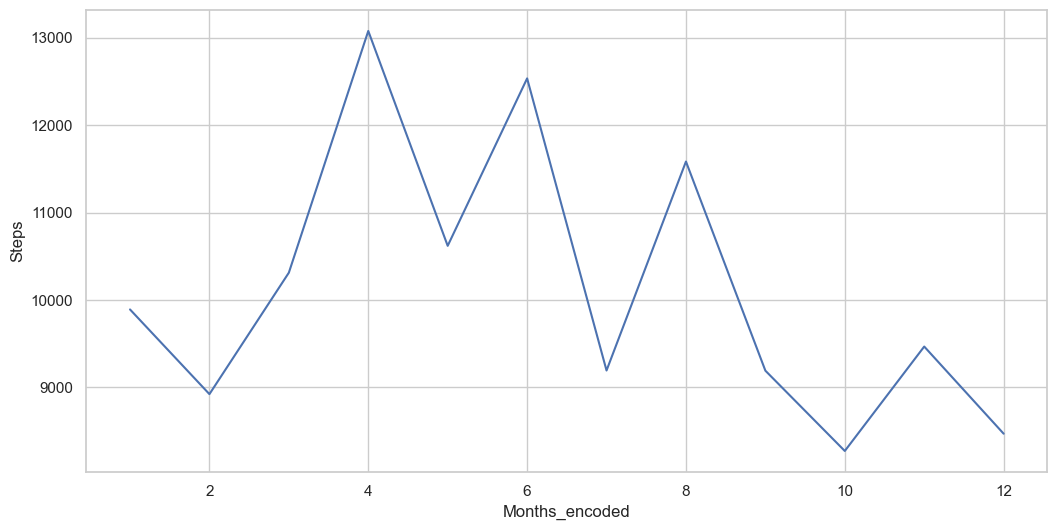

In [5]:
# AVERAGE STEPS BY MONTH_ENCODED
df = pd.DataFrame(fitbit[['Steps','Months_encoded']])
df = df.groupby('Months_encoded').mean().reset_index()
ax = sns.lineplot(df, x=df['Months_encoded'], y=df['Steps'])
plt.savefig("D:/PROGRAMAS/GIT/Git/Ironhack/lab-matplotlib-seaborn/figures/avg_steps_by_month")
plt.show()

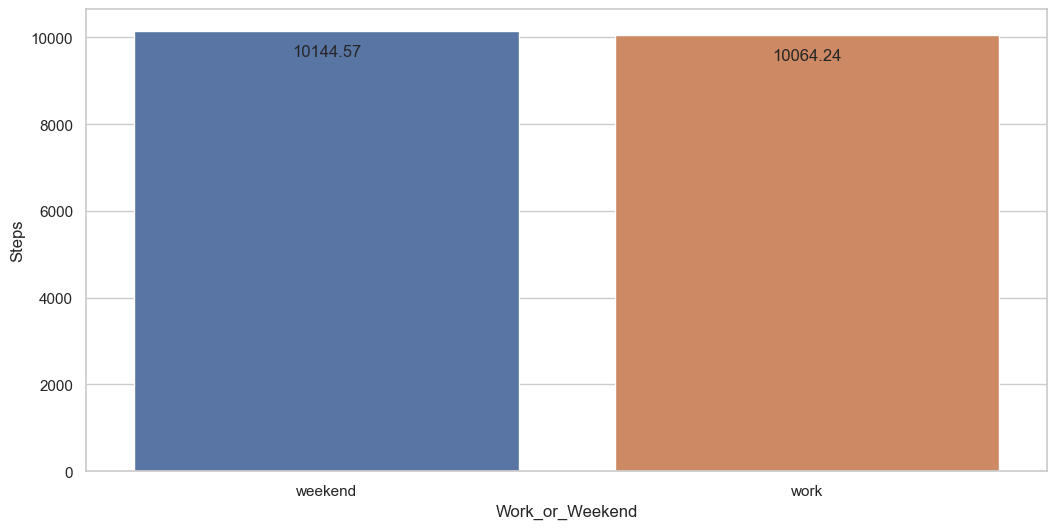

In [6]:
# AVERAGE STEPS BY WORK_OR_WEEKEND
df = pd.DataFrame(fitbit[['Steps','Work_or_Weekend']])
df['Work_or_Weekend'] = df['Work_or_Weekend'].map({0: 'work', 1: 'weekend'})
df = df.groupby('Work_or_Weekend').mean().reset_index()
ax = sns.barplot(df, x=df['Work_or_Weekend'], y=df['Steps'])
def show_ax_numbers():
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, -15), textcoords='offset points')
show_ax_numbers()
plt.savefig("D:/PROGRAMAS/GIT/Git/Ironhack/lab-matplotlib-seaborn/figures/avg_steps_by_work_or_weekend")
plt.show()

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

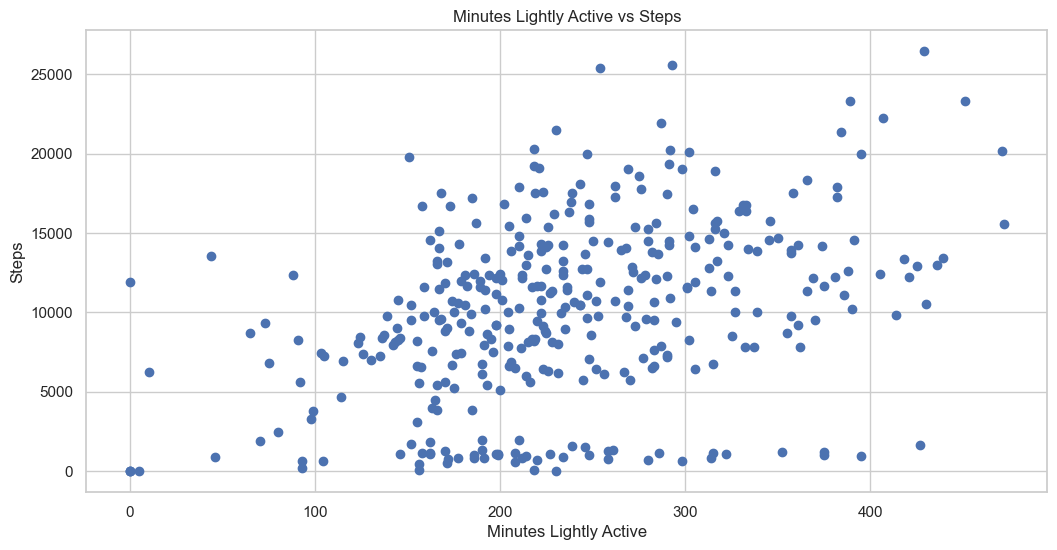

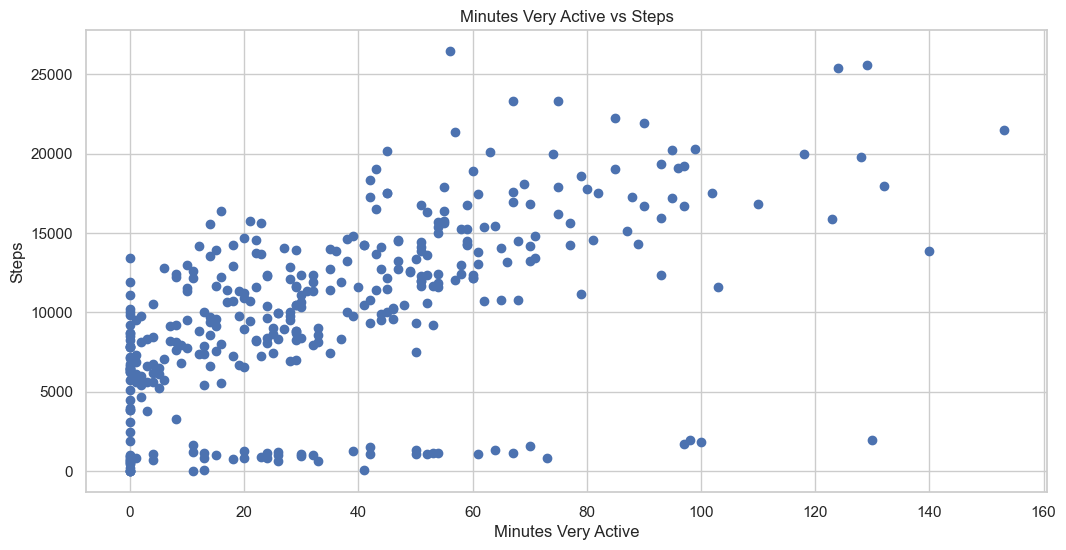

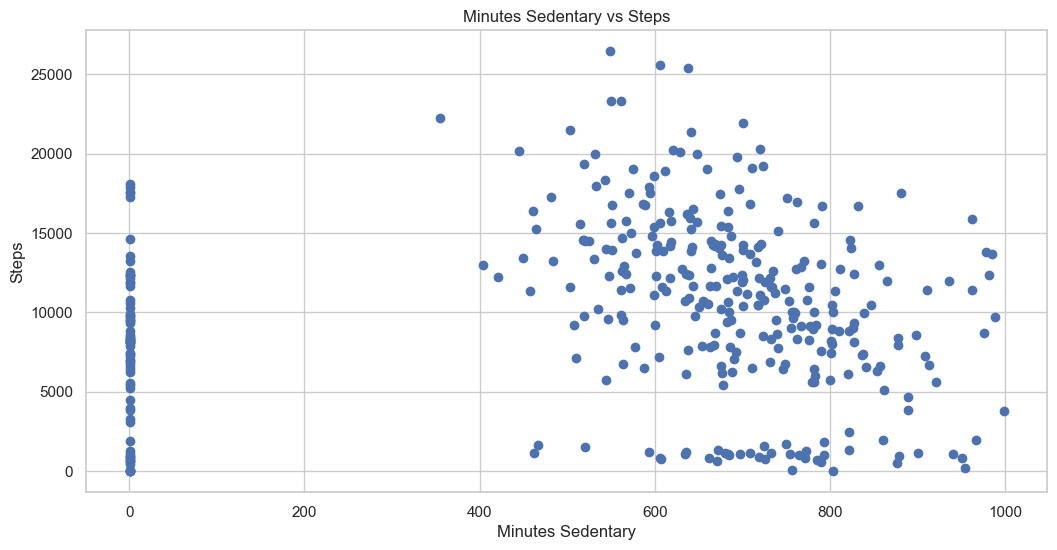

In [7]:
columns = ['Minutes Lightly Active','Minutes Very Active','Minutes Sedentary']
for column in columns:
    plt.scatter(fitbit[column], fitbit['Steps'])
    plt.xlabel(column)
    plt.ylabel('Steps')
    plt.title(f'{column} vs Steps')
    plt.show()

## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [8]:
titanic = pd.read_csv('../data/titanic.csv')

#### Explore the titanic dataset using Pandas dtypes.

In [9]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [10]:
# NUMERICAL VARIABLES
titanic.select_dtypes(include=[int,float]).head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250
3,4,1.0,1,35.0,1,0,53.1000
4,5,0.0,3,35.0,0,0,8.0500


In [11]:
# CATEGORICAL VARIABLES
titanic.select_dtypes(include=[object]).head(5)

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [12]:
sns.set(rc={"figure.figsize": (12.6,6.)})
import matplotlib.style
matplotlib.style.use('classic')

#### Use the right visulalization to show the distribution of column `Age`.

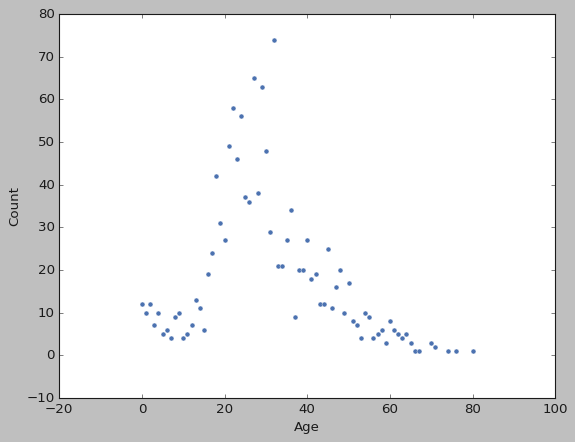

In [13]:
df = pd.DataFrame(titanic['Age'])
df['Age'] = df['Age'].astype(int)
df = df['Age'].value_counts().reset_index().rename(columns={'index':'Age','Age':'Count'})
ax = sns.scatterplot(df, x=df['Age'], y=df['Count'])

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

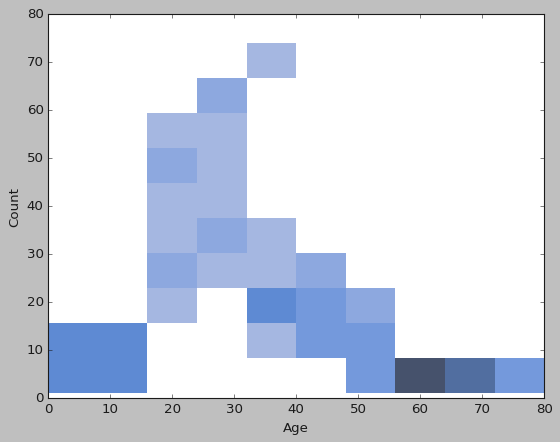

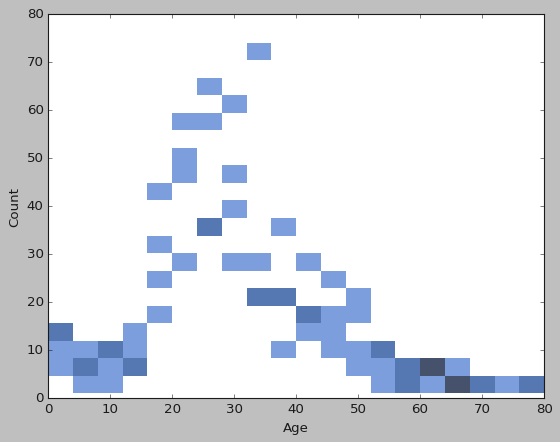

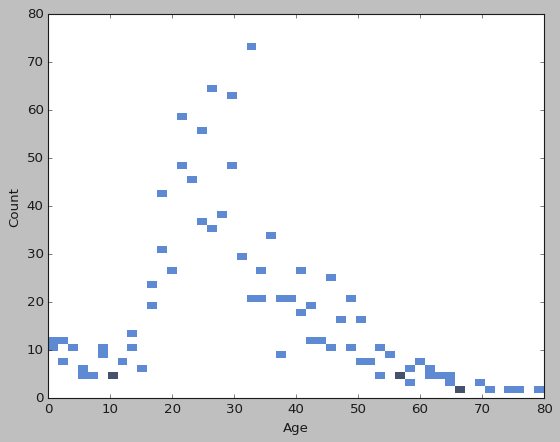

In [14]:
bins = [10,20,50]
for i in bins:
    ax = sns.histplot(df, x=df['Age'], y=df['Count'], bins=i)
    plt.show()

#### How does the bin size affect your plot?

##### Answer: The size of every range of data is changing, so you can look at the global data with more or less precision

#### Use seaborn to show the distribution of column `Age`.

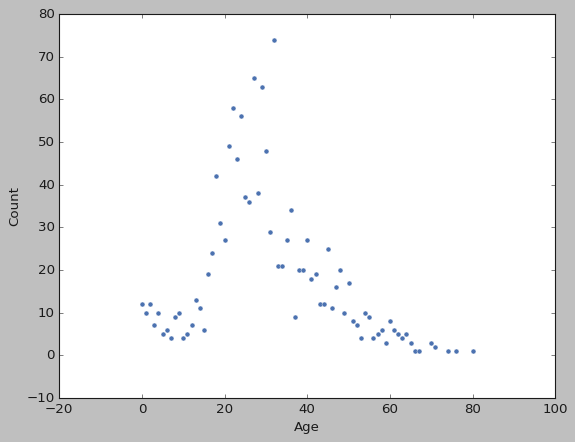

In [15]:
# Done above:
ax = sns.scatterplot(df, x=df['Age'], y=df['Count'])

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

In [16]:
df = pd.DataFrame(titanic['Gender'])
df = df.groupby('Gender').agg('value_counts').reset_index().rename(columns={0:'Count'})

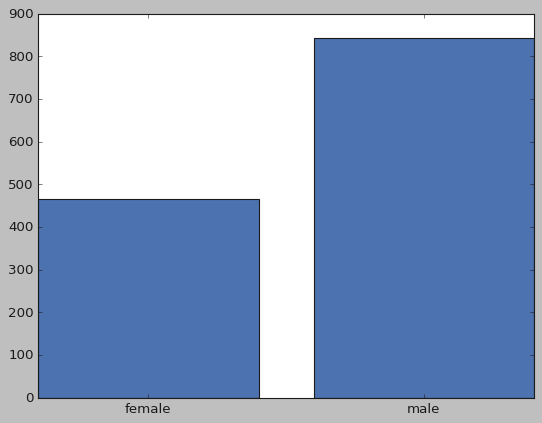

In [17]:
# Method 1 - matplotlib
ax = plt.bar(df.Gender,df.Count)

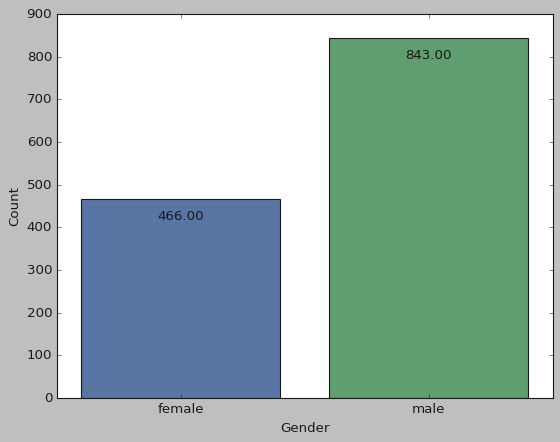

In [18]:
# Method 2 - seaborn
ax = sns.barplot(df, x=df['Gender'], y=df['Count'])
show_ax_numbers()
plt.show()

#### Use the right plot to visualize the column `Pclass`.

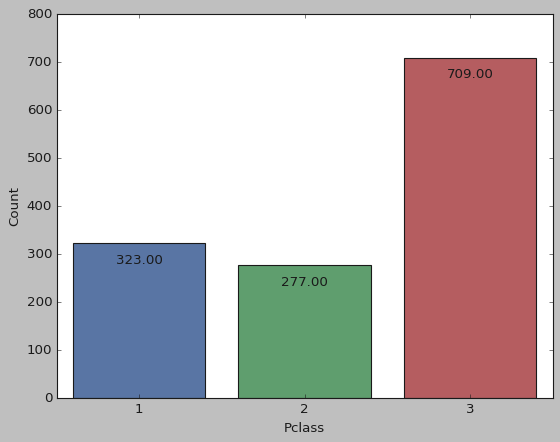

In [19]:
df = pd.DataFrame(titanic['Pclass'])
df = df.groupby('Pclass').agg('value_counts').reset_index().rename(columns={0:'Count'})
ax = sns.barplot(df, x=df['Pclass'], y=df['Count'])
show_ax_numbers()
plt.show()

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

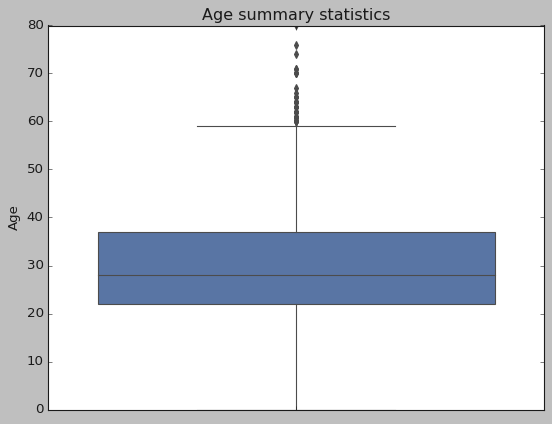

In [64]:
df = titanic
sns.boxplot(data=df, y='Age')
plt.title('Age summary statistics')
plt.show()

#### What does the last plot tell you about the feature `Age`?

#### Answer:
* ##### Q1: Goes from 0 to 22 years.
* ##### Q2 and Q3 have the 50% of the data.
* ##### Q2: Goes from 22 to 28 years.
* ##### Average: Is on 28 years.
* ##### Q3: Goes from 28 to 38 years.
* ##### Q4: Goes from 38 to 59 years.
* ##### Outliers: Are present from 60 years onwards.

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

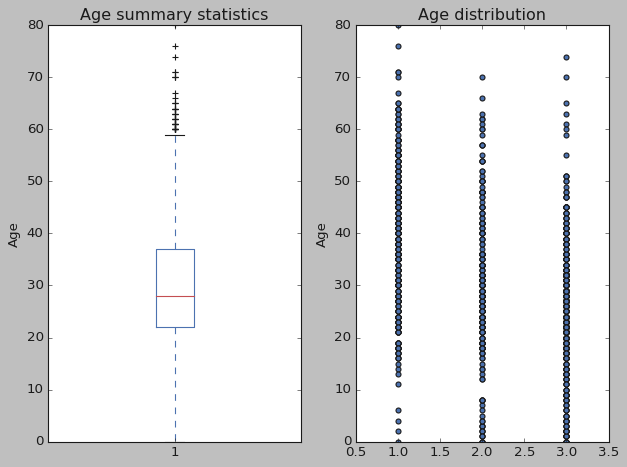

In [51]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.boxplot(df['Age']);
ax1.set_title('Age summary statistics')
ax1.set_ylabel('Age')
ax2.scatter(x= df['Pclass'] ,y= df['Age'])
ax2.set_title('Age distribution')
ax2.set_ylabel('Age')
ax2.set_ylim(0, 80)
ax2.set_xlim(0.5, 3.5)

plt.tight_layout()
plt.show()

#### What additional information does the last plot provide about feature `Age`?

#### Answer: If we look the distribution VS Pclass, we can see:
* ##### 1st class people is older than the average of 2nd and 3rd.
* ##### 2nd class people is balanced.
* ##### 3rd class people is younger than the average of 1st and 2nd.

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

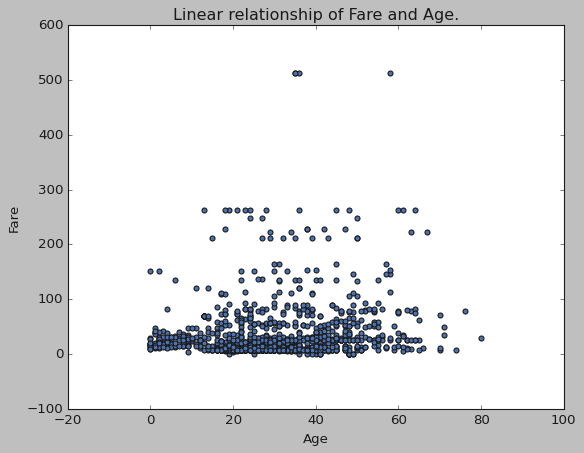

In [57]:
# Method 1 - matplotlib
plt.scatter(x= df['Age'], y= df['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Linear relationship of Fare and Age.')
plt.show()

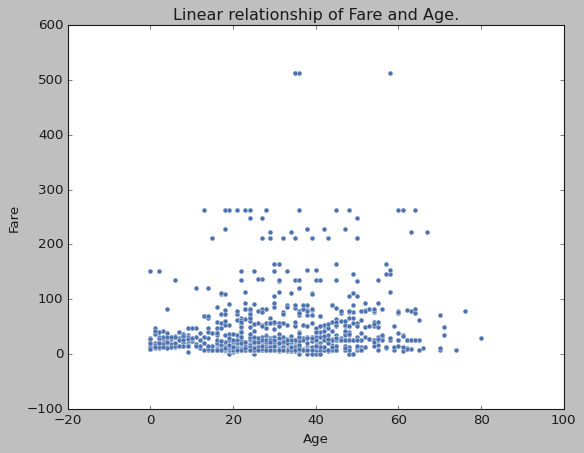

In [59]:
# Method 2 - seaborn
sns.scatterplot(data= df, x= 'Age', y= 'Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Linear relationship of Fare and Age.')
plt.show()

#### Plot the correlation matrix using seaborn.

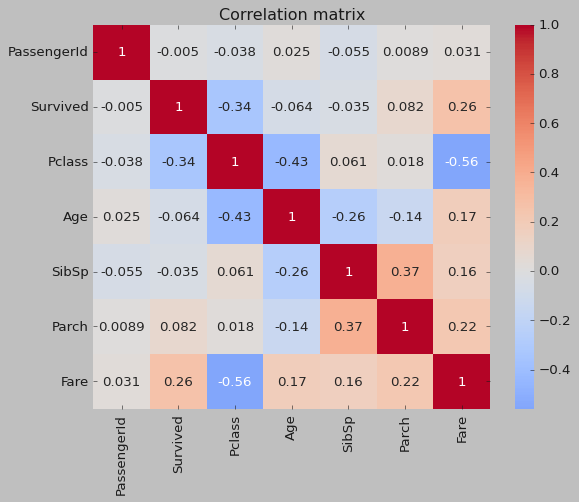

In [63]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation matrix')
plt.show()

#### What are the most correlated features?

#### Answer:
##### The most correlated features are:
* ##### SibSp VS Parch with 0.37
* ##### Survived VS Fare with 0.26

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

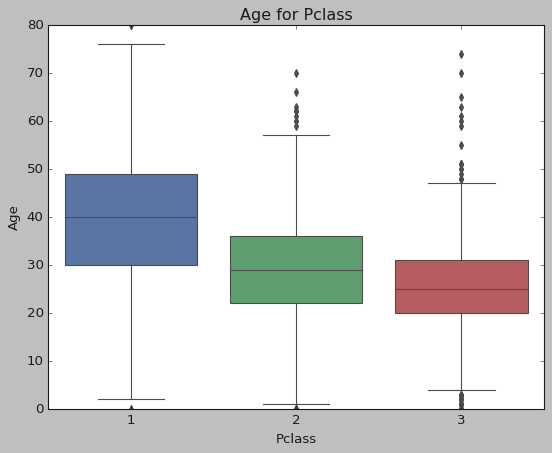

In [71]:
sns.boxplot(data= df, x= 'Pclass', y= 'Age')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.title('Age for Pclass')
plt.show()

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

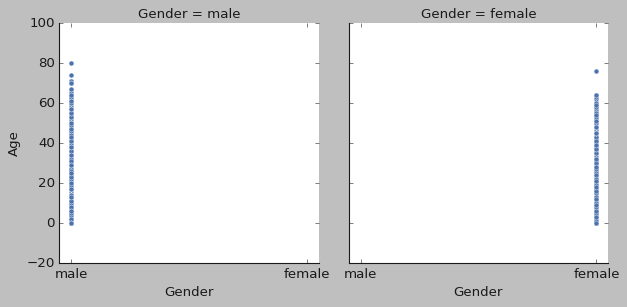

In [81]:

g = sns.FacetGrid(df, col='Gender', height=4)
g.map(sns.scatterplot, 'Gender','Age')
plt.show()